<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

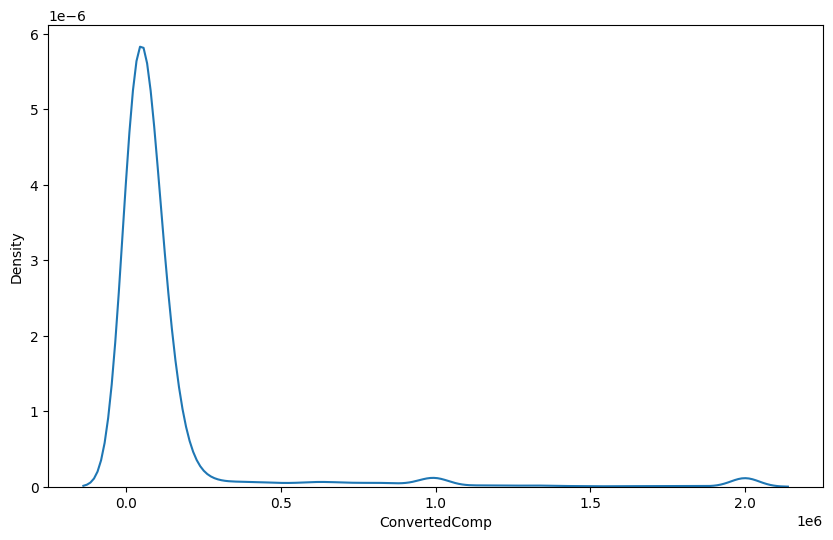

In [4]:
# your code goes here
# kita mau mengamati persebaran data dari kolom ConvertedComp yang isinya data gaji tahunan yang udah dikonversi 
# ke USD dengan exchange rate pada 2019-02-01
# caranya, bikin plot

plt.figure(figsize=(10,6))
sns.kdeplot(df['ConvertedComp'])

plt.show()

Plot the histogram for the column `ConvertedComp`.


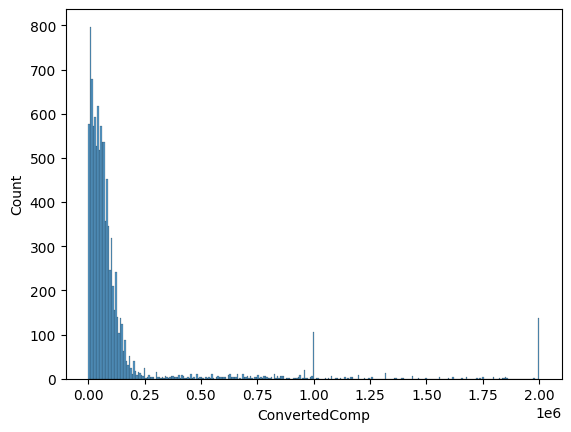

In [5]:
# your code goes here
sns.histplot(df['ConvertedComp'])
plt.show()

**Catatan:** le6 maksudnya 10^6

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
print(df['ConvertedComp'].median())

57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [8]:
df['Gender'].unique()

array(['Man', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming', nan,
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [9]:
# Menghitung jumlah responden yang mengidentifikasi diri hanya sebagai 'Man'
print((df['Gender'] == 'Man').sum())

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# your code goes here
df_woman = df[df['Gender'] == 'Woman']
print(df_woman['ConvertedComp'].median())

57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


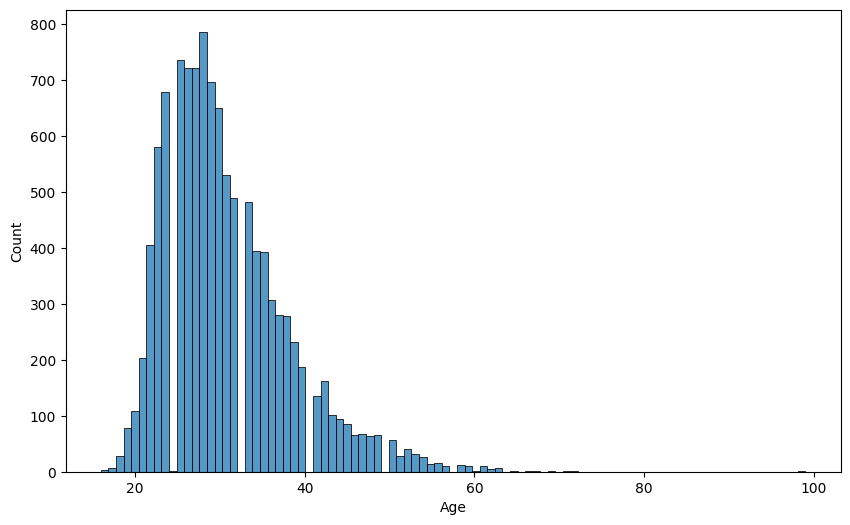

In [12]:
# your code goes here
plt.figure(figsize=(10,6))
sns.histplot(df['Age'])
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


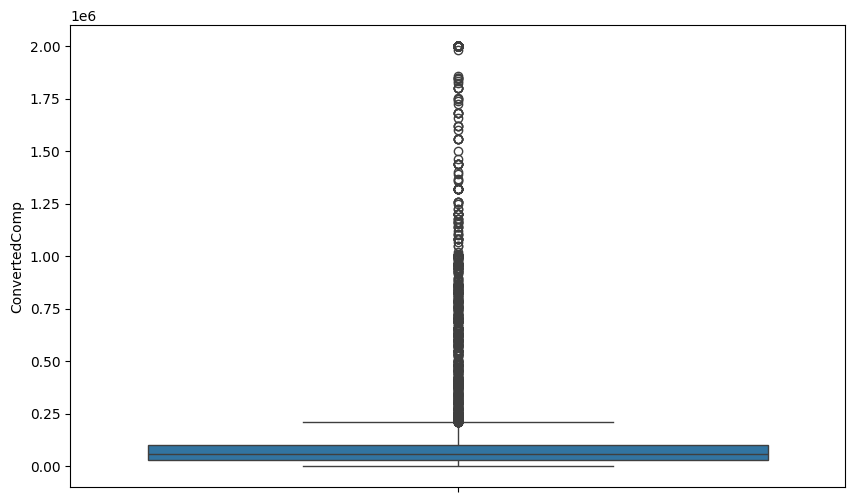

In [13]:
# your code goes here
plt.figure(figsize=(10,6))
sns.boxplot(df['ConvertedComp'])
plt.show()

<Axes: ylabel='ConvertedComp'>

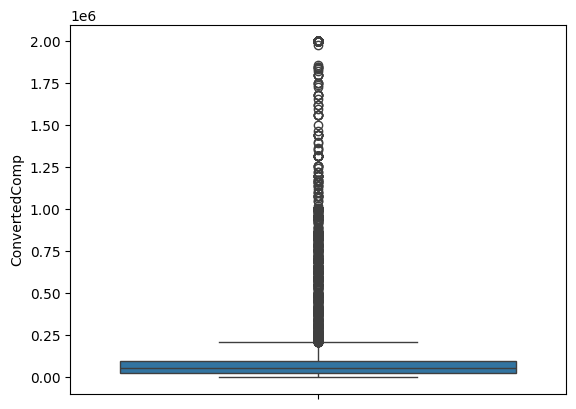

In [14]:
sns.boxplot(y=df['ConvertedComp'].dropna())  # Menghilangkan NaN

Sama aja walaupun udah diilangin NaN nya. Jadi outliernya ada. Banyak o_o

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# your code goes here
IQR_CC = df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25)
print(IQR_CC)

73132.0


Find out the upper and lower bounds.


In [16]:
# your code goes here
UB_CC = df['ConvertedComp'].quantile(0.75) + 1.5 * IQR_CC
LB_CC = df['ConvertedComp'].quantile(0.25) - 1.5 * IQR_CC
print('upper bound:', UB_CC)
print('lower bound:', LB_CC)

upper bound: 209698.0
lower bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
# your code goes here
outliers_CC = ((df['ConvertedComp'] > UB_CC) | (df['ConvertedComp'] < LB_CC))
print(outliers_CC.sum())

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
# cek dulu jumlah row sebelum outliers nya didrop
print(df['ConvertedComp'].count())

10582


In [19]:
# your code goes here
no_outliers_CC = ((df['ConvertedComp'] <= UB_CC) & (df['ConvertedComp'] >= LB_CC))
no_outliers_CC = df[no_outliers_CC]
no_outliers_CC.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult


In [20]:
# jumlah data tanpa outlier dari ConvertedComp
no_outliers_CC.shape[0]

9703

Dan hasilnya sama dengan jumlah row sebelum outliers nya didrop dikurangi jumlah outliernya

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [21]:
# your code goes here

# Memilih hanya kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Menghitung korelasi antara kolom 'Age' dan kolom lainnya
correlation_with_age = numerical_columns.corr()['Age']

# Menampilkan hasil korelasi
print(correlation_with_age)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
